# INTRODUCTION




The Student Performance Detection project is an exploration into understanding how various factors impact the academic performance of students. By leveraging machine learning techniques, we aim to develop a predictive model that can accurately predict a student's performance based on variables such as gender, ethnicity, parental level of education, lunch, and test preparation course.



Education plays a crucial role in shaping a student's future, and it is essential to identify the factors that contribute to academic success. By analyzing a comprehensive dataset that includes information about students' test scores and the aforementioned variables, we can uncover insights that shed light on the relationships between these factors and student performance.

This project offers an opportunity to delve into the world of machine learning and its application in the education domain. By harnessing the power of data analysis and predictive modeling, we can gain a deeper understanding of the underlying patterns and dynamics that influence students' test scores.

Through this project, we aim to provide educators, administrators, and policymakers with valuable insights that can inform decision-making processes and interventions targeted at improving student outcomes. By detecting the key factors that impact student performance, we can identify areas for improvement and implement strategies that support educational success.

Whether it's uncovering the impact of parental education levels, understanding the influence of gender and ethnicity, or examining the effectiveness of test preparation courses and the role of lunch programs, this project offers a comprehensive analysis of the multifaceted factors that shape student performance.

By leveraging machine learning algorithms and techniques, we can develop a predictive model that not only aids in understanding the relationships between variables but also provides a tool for predicting student performance accurately. This predictive capability can be a valuable resource for educators, allowing them to identify students who may require additional support or intervention to maximize their academic potential.

The Student Performance Detection project seeks to contribute to the ongoing efforts to improve educational outcomes by providing a data-driven approach to understanding and predicting student performance. Through the exploration of various factors, we aim to empower stakeholders with insights that can drive targeted interventions and create a more equitable and effective educational system.

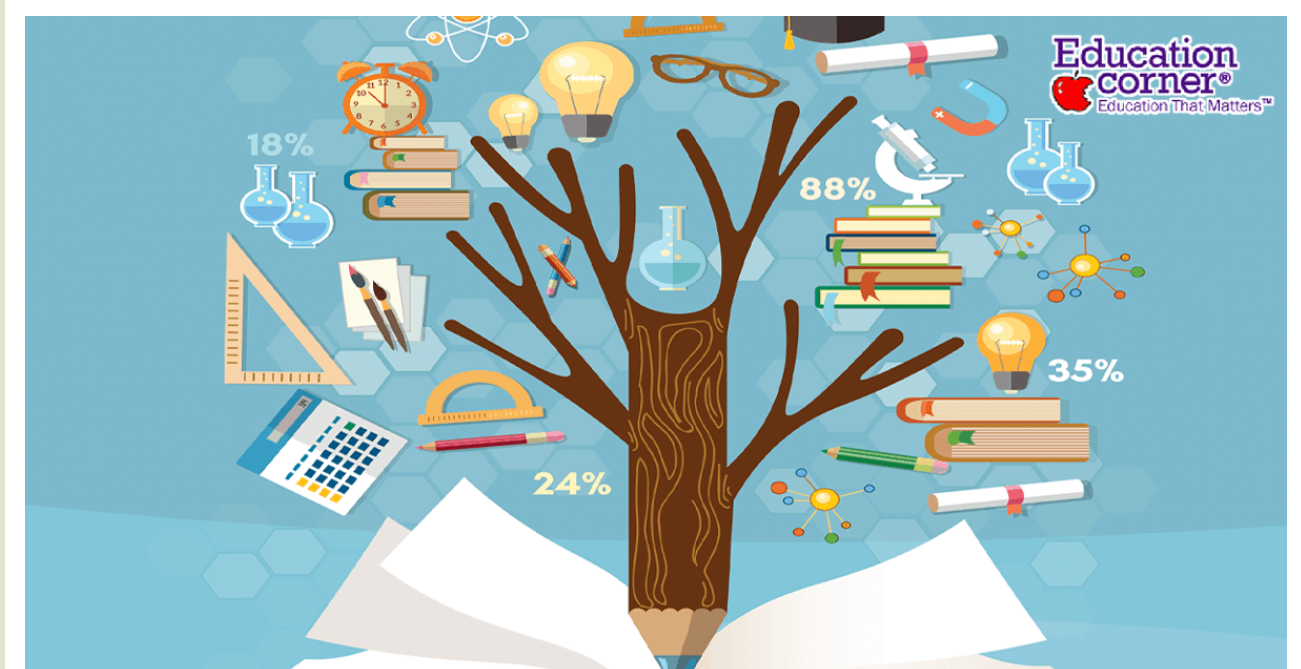

# PROBLEM STATEMENT

The main objective of this project is to understand the relationship between student performance and various factors that may influence it. By utilizing machine learning techniques, we aim to develop a predictive model that can accurately predict a student's performance based on the given variables.

# Data Cleaning

In [19]:
!pip install catboost --quiet

  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-39
      creating build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/plot_helpers.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/metrics.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/version.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/text_processing.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/datasets.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/__init__.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copyi

In [3]:
!pip install xgboost --quiet

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.model_selection import train_test_split


In [9]:
# Call the function with the data file path
data_file_path = '/Users/macbook/Documents/GitHub/Student-Performance-Indicator/Data/StudentsPerformance.csv'
df = pd.read_csv(data_file_path)

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
x = df.drop(columns=['math score'],axis=1)

In [12]:
y = df['math score']

In [13]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
X = preprocessor.fit_transform(x)

In [16]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Model Building 

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7055
- Mean Absolute Error: 4.5122
- R2 Score: 0.8556
-----------------------

In [21]:
data = {"model":list(models.keys()),"r2_score":r2_list}

In [22]:
x =pd.DataFrame(data)

In [23]:
x

,model,r2_score
0,Linear Regression,0.880433
1,Lasso,0.825320
2,Ridge,0.880593
3,K-Neighbors Regressor,0.783193
4,Decision Tree,0.719157
5,Random Forest Regressor,0.854210
6,XGBRegressor,0.821589
7,AdaBoost Regressor,0.846459


In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the linear regression model is %.2f" %score)

 Accuracy of the linear regression model is 88.04


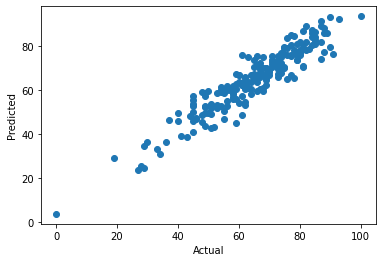

In [26]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [27]:
frame = {"actual":y_test,"predicted":y_pred,"difference":y_test-y_pred}

In [28]:
pd.DataFrame(frame)

,actual,predicted,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
